In [1]:
import pandas as pd

In [2]:
cor  = pd.read_csv('Coronavirus_data', header=None)

#### 一个例子

In [3]:
wor = cor[0][1]

In [4]:
from nltk.tokenize import sent_tokenize
sent_tokenize(wor)

['荷兰新增1026例新冠肺炎确诊病例 累计15723例\x012020-04-03\x01海外网\x01\u3000\u3000原标题：荷兰新增1026例新冠肺炎确诊病例 累计15723例   \u3000\u3000[海外网4月3日|战疫全时区]据荷兰卫生部官网最新数据 过去24小时 该国新增1026例新冠肺炎确诊病例\x01https://news.sina.com.cn/w/2020-04-03/doc-iimxyqwa4985415.shtml\x01原标题：荷兰新增1026例新冠肺炎确诊病例 累计15723例[海外网4月3日|战疫全时区]据荷兰卫生部官网最新数据，过去24小时，该国新增1026例新冠肺炎确诊病例，累计确诊15723例。新增新冠肺炎死亡病例148例，累计死亡1487例。责任编辑：张建利']

In [5]:
import jieba

In [6]:
# 精确模式
seg_list = jieba.cut(wor, cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/rw/nr6x4m013zb9hmrmkhk_3t3m0000gn/T/jieba.cache
Loading model cost 1.086 seconds.
Prefix dict has been built successfully.


Default Mode: 荷兰/ 新增/ 1026/ 例新冠/ 肺炎/ 确诊/ 病例/  / 累计/ 15723/ 例/ / 2020/ -/ 04/ -/ 03/ / 海外/ 网/ / 　/ 　/ 原/ 标题/ ：/ 荷兰/ 新增/ 1026/ 例新冠/ 肺炎/ 确诊/ 病例/  / 累计/ 15723/ 例/  /  /  / 　/ 　/ [/ 海外/ 网/ 4/ 月/ 3/ 日/ |/ 战疫/ 全时区/ ]/ 据/ 荷兰/ 卫生部/ 官网/ 最新/ 数据/  / 过去/ 24/ 小时/  / 该国/ 新增/ 1026/ 例新冠/ 肺炎/ 确诊/ 病例/ / https/ :/ // // news/ ./ sina/ ./ com/ ./ cn/ // w/ // 2020/ -/ 04/ -/ 03/ // doc/ -/ iimxyqwa4985415/ ./ shtml/ / 原/ 标题/ ：/ 荷兰/ 新增/ 1026/ 例新冠/ 肺炎/ 确诊/ 病例/  / 累计/ 15723/ 例/ [/ 海外/ 网/ 4/ 月/ 3/ 日/ |/ 战疫/ 全时区/ ]/ 据/ 荷兰/ 卫生部/ 官网/ 最新/ 数据/ ，/ 过去/ 24/ 小时/ ，/ 该国/ 新增/ 1026/ 例新冠/ 肺炎/ 确诊/ 病例/ ，/ 累计/ 确诊/ 15723/ 例/ 。/ 新增/ 新冠/ 肺炎/ 死亡/ 病例/ 148/ 例/ ，/ 累计/ 死亡/ 1487/ 例/ 。/ 责任编辑/ ：/ 张建利


In [7]:
import jieba.analyse

In [8]:
ser = jieba.analyse.textrank(wor, topK=15, withWeight=False, 
                       allowPOS=('ns', 'n', 'vn', 'v'))

#### 逐一分词

In [20]:
sen = list()#创建空列表储存各个关键词
num = len(cor)
for i in range(1, num):
    wor = cor[0][i-1]
    ser = jieba.analyse.textrank(wor, topK=15, withWeight=False, 
                       allowPOS=('ns', 'n', 'vn', 'v'))
    sen = sen+ser

#### 词云图

In [23]:
from os import path
from imageio import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
d = path.abspath('.')
back_coloring_path = "ccc.jpg"
back_coloring = imread(path.join(d, back_coloring_path))

In [40]:
met_txt = " ".join(str(i) for i in sen)

In [63]:
wc = WordCloud(
    background_color='white',  # 设置背景颜色，与图片的背景色相关
    mask=back_coloring_path,  # 设置背景图片
    max_words=2000,  # 设置最大显示的字数
    max_font_size=150,  # 设置字体最大值
    random_state=1,  # 设置有多少种随机生成状态，即有多少种配色方案
    scale=1  # 设置生成的词云图的大小
)

In [54]:
wcdict={}
for word in sen:
    if len(word)==1:
        continue
    else:
        wcdict[word]=wcdict.get(word,0)+1

In [56]:
wc.generate(wcdict)

TypeError: expected string or bytes-like object

In [57]:
wl_split=' '.join(sen)

In [66]:
mywc = Wordcloud().generate(wl_split)

NameError: name 'Wordcloud' is not defined

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


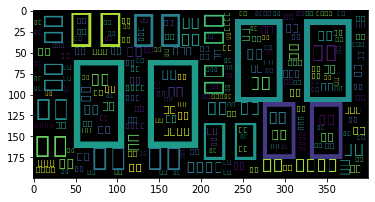

In [61]:
plt.imshow(mywc)